# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [30]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


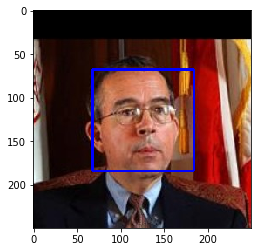

In [47]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [36]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

The Human face detection showed that on 99 images out of 100 at least one human face was detected. I assume that the answer to the question is 99%. But it is not absolutelly correct, because we do not know if we have images with 2 and more faces and if we detect all faces. We just check that at least one face is detected.

At the same time the accuracy of the dog face detection is very low, around 7%. And the same applies to the gog faces detection. We do not know if 7 images out of 100 had human face or not. But I assume, 7%would be the correct answer, taking into the account calculations we have below.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_detected = 0
for human_image in human_files_short:
    if face_detector(human_image):
        human_faces_detected += 1

dog_faces_detected = 0
for dog_image in dog_files_short:
    if face_detector(dog_image):
        dog_faces_detected += 1

print("Human face accuracy:", human_faces_detected*1.0/100)
print("Dog face accuracy:", dog_faces_detected*1.0/100)

Human face accuracy: 0.99
Dog face accuracy: 0.07


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [42]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [43]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    image = Image.open(img_path)
    
    # According to https://keras.io/applications/#vgg16
    # the input size for VGG16 is 224*224*3, where 3 is the channel
    transformer = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])
    
    tensor = transformer(image)
    if use_cuda:
        tensor = tensor.cuda()

    ## Return the *index* of the predicted class for that image
    output = VGG16(tensor.reshape(1, 3, 224, 224))

    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    return preds # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [40]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    return prediction >= 151 and prediction <= 268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Usong the VGG16 and looking for dogs we have 0% accuracy detecting people's face and on 97% of images we could detect dogs. So the situation is oposit to what we had previously.

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_faces_detected = 0
for human_image in human_files_short:
    if dog_detector(human_image):
        human_faces_detected += 1

dog_faces_detected = 0
for dog_image in dog_files_short:
    if dog_detector(dog_image):
        dog_faces_detected += 1

print("Human face accuracy:", human_faces_detected*1.0/100)
print("Dog face accuracy:", dog_faces_detected*1.0/100)

Human face accuracy: 0.01
Dog face accuracy: 0.97


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.CenterCrop(224),
                                       transforms.RandomRotation(20),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,), (0.5,)),
                                      ]) 

test_valid_transforms = transforms.Compose([transforms.Resize(224),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5,), (0.5,)),
                                           ])

# Pass transforms in here, then run the next cell to see how the transforms look
data_dir = "dogImages"
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_valid_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_valid_transforms)

def getLoaders(batchSize):
    loaders = dict()
    loaders["train"] = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batchSize)
    loaders["test"] = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batchSize)
    loaders["valid"] = torch.utils.data.DataLoader(valid_data, shuffle=True, batch_size=batchSize)

    return loaders


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

__Data resize__

As the input for the neural network I use 224x224x3 size, where 3 is the number of channels. I use this dimentions just to follow the VGG16 approach. And it worked. If it would not work I would try to use 2^n dimentions. As it was recommended during the lectures.

__Augmentation__

As we know, augmentation of the data is one of the important steps of data pre-processing.
For the training dataset I do a random horizontal flip of the image, random rotation up to 20 degrees and I resize images to the size 224 by 224 pixels (H,W). And I also normalize the tensor values.

For the testing and validation data sets I do just the resizing part and normalization of the Tensor. I do not do any other manipulations, since we want to know how the model performs on raw data.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        """
        We can compute the spatial size of the output volume as a function of the input volume size (W), 
        the kernel/filter size (F), the stride with which they are applied (S), and the amount of zero 
        padding used (P) on the border. 
        The correct formula for calculating how many neurons define the output_W is given by (W−F+2P)/S+1.
        """

        self.pool2 = nn.MaxPool2d(2, 2)
        self.pool3 = nn.MaxPool2d(3, 3)
        self.dropout = nn.Dropout(0.2)

        # default padding = 0, stride = 1
        self.conv1 = nn.Conv2d(3, 16, 2, stride = 2)
        self.conv2 = nn.Conv2d(16, 32, 2, stride = 2)
        self.conv3 = nn.Conv2d(32, 64, 2, stride = 2)
        
        self.fc1 = nn.Linear(256, 256)
        self.batchnorm = nn.BatchNorm1d(num_features=256)
        # according to the path structure in training dir, we have 133 predictions
        self.fc2 = nn.Linear(256, 133)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool3(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool2(F.relu(self.conv3(x)))
        x = self.dropout(x)
        
        # flatten image input
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.batchnorm(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(3, 16, kernel_size=(2, 2), stride=(2, 2))
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2))
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (batchnorm): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__

I originally started with 5 layers, 224x224x3 input, 16-32-64-128 channels leyers, and nn.MaxPool2d(2, 2). Dropout = 0.2

As the result the trainig was not that fast and very slow.

I added nn.BatchNorm1d, added a nn.MaxPool2d(3, 3) and reduced the number of layers. And trained for 100 epochs.
The result was great. I had 17% accuracy. But I wanted to tests different scenarious.

I wrote the for loops and tested SGD, Adam, different learning rates and batch sizes. And trained each config for 20 epochs.

You can find the results below. 

Looks like 
Optimizer Adam
Learning rate: 0.01
Batch size: 32

Optimizer SGD
Learning rate: 0.05
Batch size: 16

Optimizer SGD
Learning rate: 0.05
Batch size: 32

Optimizer SGD
Learning rate: 0.1
Batch size: 16

Optimizer SGD
Learning rate: 0.1
Batch size: 32

Optimizer SGD
Learning rate: 0.2
Batch size: 32

They all showed accuracy >= 10%

As we can see, Adam performs beter with very low learning rate. At the same time SGD can perform on at higher learning rate. Also looks like 32 is the perfect batch size.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [20]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
    # return trained model
    return model


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))


In [20]:
import torch.optim as optim
trainig_epochs = 20

for optimizer_type in ["Adam", "SGD"]:
    for learning_rate in [0.01, 0.05, 0.1, 0.2]:
        for batch_size in [16, 32, 64]:
            print("===========================================================================")
            print("Optimizer", optimizer_type)
            print("Learning rate:", learning_rate)
            print("Batch size:", batch_size)
            
            # instantiate the CNN
            model_scratch = Net()

            # move tensors to GPU if CUDA is available
            if use_cuda:
                model_scratch.cuda()
            
            if optimizer_type == "SGD":
                optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = learning_rate)
            elif optimizer_type == "Adam":
                optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = learning_rate)
                
            model_path = "model_" + str(batch_size) + "_" + str(learning_rate) + "_" + optimizer_type + ".pt"

            loaders_scratch = getLoaders(batch_size)
            # train the model
            trained_model = train(trainig_epochs, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, model_path)

            # load the model that got the best validation accuracy
            trained_model.load_state_dict(torch.load(model_path))

            # call test function
            test(loaders_scratch, trained_model, criterion_scratch, use_cuda)

Optimizer Adam
Learning rate: 0.01
Batch size: 16
Epoch: 1 	Training Loss: 5.009898 	Validation Loss: 4.828154
Validation loss decreased (inf --> 4.828154).  Saving model ...
Epoch: 2 	Training Loss: 4.780351 	Validation Loss: 4.703519
Validation loss decreased (4.828154 --> 4.703519).  Saving model ...
Epoch: 3 	Training Loss: 4.730960 	Validation Loss: 4.754599
Epoch: 4 	Training Loss: 4.674394 	Validation Loss: 4.601976
Validation loss decreased (4.703519 --> 4.601976).  Saving model ...
Epoch: 5 	Training Loss: 4.580863 	Validation Loss: 4.513675
Validation loss decreased (4.601976 --> 4.513675).  Saving model ...
Epoch: 6 	Training Loss: 4.525033 	Validation Loss: 4.473963
Validation loss decreased (4.513675 --> 4.473963).  Saving model ...
Epoch: 7 	Training Loss: 4.487872 	Validation Loss: 4.435718
Validation loss decreased (4.473963 --> 4.435718).  Saving model ...
Epoch: 8 	Training Loss: 4.441123 	Validation Loss: 4.456018
Epoch: 9 	Training Loss: 4.419178 	Validation Loss: 4

Epoch: 18 	Training Loss: 4.906603 	Validation Loss: 4.890982
Epoch: 19 	Training Loss: 4.907737 	Validation Loss: 4.898507
Epoch: 20 	Training Loss: 4.906208 	Validation Loss: 4.892298
Test Loss: 4.873489


Test Accuracy:  1% ( 9/836)
Optimizer Adam
Learning rate: 0.05
Batch size: 32
Epoch: 1 	Training Loss: 5.029181 	Validation Loss: 4.884128
Validation loss decreased (inf --> 4.884128).  Saving model ...
Epoch: 2 	Training Loss: 4.892867 	Validation Loss: 4.886184
Epoch: 3 	Training Loss: 4.896600 	Validation Loss: 4.881871
Validation loss decreased (4.884128 --> 4.881871).  Saving model ...
Epoch: 4 	Training Loss: 4.893530 	Validation Loss: 4.884832
Epoch: 5 	Training Loss: 4.894645 	Validation Loss: 4.885847
Epoch: 6 	Training Loss: 4.895496 	Validation Loss: 4.884295
Epoch: 7 	Training Loss: 4.893926 	Validation Loss: 4.885160
Epoch: 8 	Training Loss: 4.894564 	Validation Loss: 4.881243
Validation loss decreased (4.881871 --> 4.881243).  Saving model ...
Epoch: 9 	Training Loss:

Epoch: 6 	Training Loss: 4.904948 	Validation Loss: 4.893855
Epoch: 7 	Training Loss: 4.904557 	Validation Loss: 4.895955
Epoch: 8 	Training Loss: 4.904905 	Validation Loss: 4.892560
Epoch: 9 	Training Loss: 4.905086 	Validation Loss: 4.898589
Epoch: 10 	Training Loss: 4.907378 	Validation Loss: 4.898266
Epoch: 11 	Training Loss: 4.906185 	Validation Loss: 4.891775
Epoch: 12 	Training Loss: 4.906002 	Validation Loss: 4.892001
Epoch: 13 	Training Loss: 4.905585 	Validation Loss: 4.892255
Epoch: 14 	Training Loss: 4.905765 	Validation Loss: 4.899445
Epoch: 15 	Training Loss: 4.906936 	Validation Loss: 4.893067
Epoch: 16 	Training Loss: 4.904122 	Validation Loss: 4.894740
Epoch: 17 	Training Loss: 4.906423 	Validation Loss: 4.888679
Validation loss decreased (4.891046 --> 4.888679).  Saving model ...
Epoch: 18 	Training Loss: 4.903447 	Validation Loss: 4.895071
Epoch: 19 	Training Loss: 4.905645 	Validation Loss: 4.904206
Epoch: 20 	Training Loss: 4.908576 	Validation Loss: 4.894358
Test 

Epoch: 17 	Training Loss: 4.163061 	Validation Loss: 4.409525
Epoch: 18 	Training Loss: 4.135198 	Validation Loss: 4.144701
Validation loss decreased (4.245367 --> 4.144701).  Saving model ...
Epoch: 19 	Training Loss: 4.125969 	Validation Loss: 4.260966
Epoch: 20 	Training Loss: 4.101559 	Validation Loss: 4.184100
Test Loss: 4.149719


Test Accuracy:  8% (73/836)
Optimizer SGD
Learning rate: 0.01
Batch size: 32
Epoch: 1 	Training Loss: 4.969992 	Validation Loss: 4.885388
Validation loss decreased (inf --> 4.885388).  Saving model ...
Epoch: 2 	Training Loss: 4.900093 	Validation Loss: 4.858335
Validation loss decreased (4.885388 --> 4.858335).  Saving model ...
Epoch: 3 	Training Loss: 4.851103 	Validation Loss: 4.824932
Validation loss decreased (4.858335 --> 4.824932).  Saving model ...
Epoch: 4 	Training Loss: 4.815667 	Validation Loss: 4.806749
Validation loss decreased (4.824932 --> 4.806749).  Saving model ...
Epoch: 5 	Training Loss: 4.759436 	Validation Loss: 4.779648
Validati

Epoch: 4 	Training Loss: 4.540948 	Validation Loss: 4.491444
Validation loss decreased (4.660791 --> 4.491444).  Saving model ...
Epoch: 5 	Training Loss: 4.434887 	Validation Loss: 4.502388
Epoch: 6 	Training Loss: 4.364609 	Validation Loss: 4.316947
Validation loss decreased (4.491444 --> 4.316947).  Saving model ...
Epoch: 7 	Training Loss: 4.291134 	Validation Loss: 4.347702
Epoch: 8 	Training Loss: 4.234070 	Validation Loss: 4.353680
Epoch: 9 	Training Loss: 4.181456 	Validation Loss: 4.335176
Epoch: 10 	Training Loss: 4.155579 	Validation Loss: 4.312550
Validation loss decreased (4.316947 --> 4.312550).  Saving model ...
Epoch: 11 	Training Loss: 4.101996 	Validation Loss: 4.203658
Validation loss decreased (4.312550 --> 4.203658).  Saving model ...
Epoch: 12 	Training Loss: 4.075720 	Validation Loss: 4.203823
Epoch: 13 	Training Loss: 4.015803 	Validation Loss: 4.228848
Epoch: 14 	Training Loss: 3.991554 	Validation Loss: 4.120637
Validation loss decreased (4.203658 --> 4.120637

Epoch: 1 	Training Loss: 4.896500 	Validation Loss: 4.792505
Validation loss decreased (inf --> 4.792505).  Saving model ...
Epoch: 2 	Training Loss: 4.777563 	Validation Loss: 4.732735
Validation loss decreased (4.792505 --> 4.732735).  Saving model ...
Epoch: 3 	Training Loss: 4.676102 	Validation Loss: 4.640005
Validation loss decreased (4.732735 --> 4.640005).  Saving model ...
Epoch: 4 	Training Loss: 4.557960 	Validation Loss: 4.519058
Validation loss decreased (4.640005 --> 4.519058).  Saving model ...
Epoch: 5 	Training Loss: 4.452534 	Validation Loss: 4.498570
Validation loss decreased (4.519058 --> 4.498570).  Saving model ...
Epoch: 6 	Training Loss: 4.369471 	Validation Loss: 4.437443
Validation loss decreased (4.498570 --> 4.437443).  Saving model ...
Epoch: 7 	Training Loss: 4.294457 	Validation Loss: 4.515407
Epoch: 8 	Training Loss: 4.251465 	Validation Loss: 4.289199
Validation loss decreased (4.437443 --> 4.289199).  Saving model ...
Epoch: 9 	Training Loss: 4.209343 

Epoch: 15 	Training Loss: 3.884700 	Validation Loss: 4.230339
Epoch: 16 	Training Loss: 3.863720 	Validation Loss: 4.240069
Epoch: 17 	Training Loss: 3.817330 	Validation Loss: 4.215708
Epoch: 18 	Training Loss: 3.796671 	Validation Loss: 4.080468
Epoch: 19 	Training Loss: 3.771117 	Validation Loss: 4.052035
Validation loss decreased (4.063891 --> 4.052035).  Saving model ...
Epoch: 20 	Training Loss: 3.737004 	Validation Loss: 4.230844
Test Loss: 3.961311


Test Accuracy:  9% (77/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [13]:
## TODO: Specify data loaders

import os

import torch
from torchvision import datasets
import torchvision.transforms as transforms

train_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.CenterCrop(224),
                                       transforms.RandomRotation(20),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,), (0.5,)),
                                      ]) 

test_valid_transforms = transforms.Compose([transforms.Resize(224),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5,), (0.5,)),
                                           ])

# Pass transforms in here, then run the next cell to see how the transforms look
data_dir = "dogImages"
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_valid_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_valid_transforms)

def getLoaders(batchSize):
    loaders = dict()
    loaders["train"] = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batchSize)
    loaders["test"] = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batchSize)
    loaders["valid"] = torch.utils.data.DataLoader(valid_data, shuffle=True, batch_size=batchSize)

    return loaders

loaders_transfer = getLoaders(32)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [14]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()


In [15]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False
    
model_transfer.classifier[6] = nn.Linear(4096,133)
if use_cuda:
    model_transfer = model_transfer.cuda()

In [17]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Well I just replaced the last layer with the required number of the outputs.

I have enough dataand the network is trained to predict dogs breeds. So just outputing 133 prediction should be fine.
I also friezed para,eters so I train only the lats layer.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [18]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier[6].parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
import numpy as np

# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.993202 	Validation Loss: 0.720927
Validation loss decreased (inf --> 0.720927).  Saving model ...
Epoch: 2 	Training Loss: 0.911180 	Validation Loss: 0.635909
Validation loss decreased (0.720927 --> 0.635909).  Saving model ...
Epoch: 3 	Training Loss: 0.839145 	Validation Loss: 0.663449
Epoch: 4 	Training Loss: 0.794726 	Validation Loss: 0.669322
Epoch: 5 	Training Loss: 0.788815 	Validation Loss: 0.624697
Validation loss decreased (0.635909 --> 0.624697).  Saving model ...
Epoch: 6 	Training Loss: 0.744121 	Validation Loss: 0.666761
Epoch: 7 	Training Loss: 0.762670 	Validation Loss: 0.713699
Epoch: 8 	Training Loss: 0.714264 	Validation Loss: 0.653414
Epoch: 9 	Training Loss: 0.676180 	Validation Loss: 0.677040
Epoch: 10 	Training Loss: 0.689525 	Validation Loss: 0.643032


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.700096


Test Accuracy: 81% (680/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(224),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5,), (0.5,)),
                                         ])
    
    image_tensor = transformations(image)[:,:,:].unsqueeze(0)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    # get sample outputs
    output = model_transfer(image_tensor)

    # convert output probabilities to predicted class
    preds_tensor = torch.argmax(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [45]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt                        
%matplotlib inline

import cv2  

def run_app(img_path):
    # display the image
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()
    
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        predicted_breed = predict_breed_transfer(img_path)
        print("Dog is detected...", predicted_breed)
        
    elif (face_detector(img_path)):
        predicted_breed = predict_breed_transfer(img_path)
        print("Human face is detected...", predicted_breed)
    else:
        print("ERROR")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

It is better, than I would expected. Was surpriced how with transfer learning I could easily achieve 80% accuracy.
But from another side, the network was good already in dogs prediction. Also was surprised that Adam here perform better then SGD.

Can be improved by:
- More data and more epochs for training
- Finetuning the parameters like batch size, learning rate and optimizer
- Use another network, like ResNet
- Better data augmentation



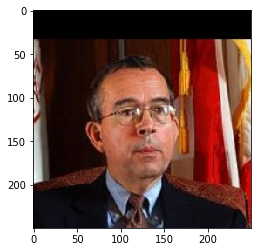

Human face is detected... American water spaniel


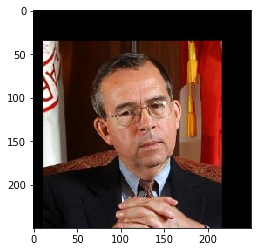

Human face is detected... Pharaoh hound


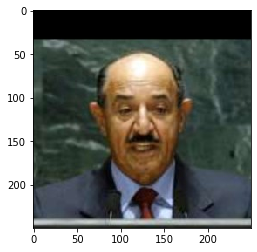

Human face is detected... Silky terrier


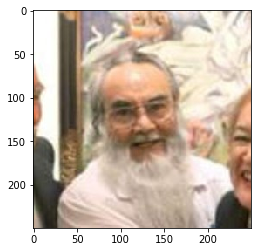

Human face is detected... Lowchen


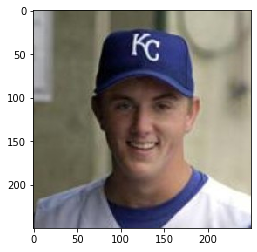

Human face is detected... Dachshund


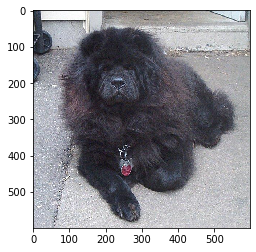

Dog is detected... Newfoundland


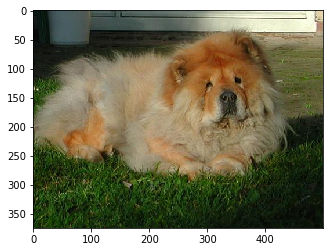

Dog is detected... Chow chow


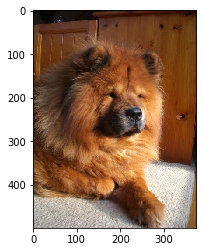

Dog is detected... Chow chow


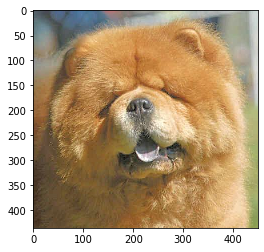

Dog is detected... Chow chow


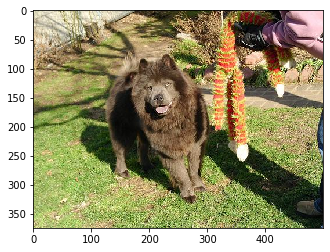

Dog is detected... Chow chow


In [49]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)